# Notebook sobre estadísticas de Pokémon
- Alvarado Morán Óscar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver

from bs4 import BeautifulSoup
import bs4

# Dataset existente

In [30]:
gen_1_7 = pd.read_csv('datos/pokemon.csv')
index = pd.Series(range(1, len(gen_1_7)+1))
gen_1_7 = gen_1_7.set_index([index])
gen_1_7.loc[1,:]

abilities            ['Overgrow', 'Chlorophyll']
against_bug                                    1
against_dark                                   1
against_dragon                                 1
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                   2
against_flying                                 2
against_ghost                                  1
against_grass                               0.25
against_ground                                 1
against_ice                                    2
against_normal                                 1
against_poison                                 1
against_psychic                                2
against_rock                                   1
against_steel                                  1
against_water                                0.5
attack                                        49
base_egg_steps      

In [3]:
# En serebii.net no está lo de basee_egg_steps ni base_happiness
# Están en Wikidex
Marshadow = {'abilities': ['Technician'], 'attack': 125, 'def': 80, 'sp_attack': 90, 'sp_defense': 90, 
             'speed': 125, 'base_total': 600, 'capture_rate': 3, 'classification': 'Gloomdweller Pokémon',
             'experience_growth': 1250000, 'height_m': 0.7, 'hp': 90, 'japanese_name': 'Marshadowマーシャドー', 
             'name': 'Marshadow', 'pokedex_number': 802, 'type1': 'fighting', 'type2': 'ghost', 'weight_kg': 22.2,
            'generation': 7, 'is_legendary': 1, 'percentage_male': np.nan, 'base_egg_steps': 30720, 
             'base_happines': 70}

In [3]:
profile = webdriver.FirefoxProfile()
profile.set_preference("browser.privatebrowsing.autostart", True)

url = 'https://www.serebii.net/pokedex-sm/802.shtml'
#url = 'https://www.serebii.net/pokedex-swsh/zarude/'

browser = webdriver.Firefox(firefox_profile = profile)
browser.implicitly_wait(30)
browser.get(url)

In [45]:
browser.quit()

In [4]:
content = browser.page_source
soup = BeautifulSoup(content)

In [29]:
# Aquí se seleccionan los datos que se necesitan.
lista = []
for a in soup.findAll('table', attrs = {'class': 'dextable'}):
    for name in a.findAll('td', attrs = {'class': 'fooinfo'}):
        lista.append(name)
        #print('------------------------------------')
print(lista[1:13])

[<td class="fooinfo">Marshadow</td>, <td class="fooinfo"><table cellpadding="0" cellspacing="0" width="120">
<tbody><tr> <td><b>Japan</b>: </td><td>Marshadow<br/>マーシャドー</td></tr>
<tr> <td><b>French</b>: </td><td>Marshadow</td></tr>
<tr> <td><b>German</b>: </td><td>Marshadow</td></tr>
<tr> <td><b>Korean</b>: </td><td>마샤도</td></tr>
</tbody></table></td>, <td class="fooinfo"><table cellpadding="0" cellspacing="0" width="120"><tbody><tr> <td><b>National</b>: </td><td>#802</td></tr>
<tr><td><b>Alola</b>: </td><td>#402</td></tr>
<tr><td><b>Melemele</b>: </td><td>#---</td></tr>
<tr><td><b>Akala</b>: </td><td>#---</td></tr>
<tr><td><b>Ula'ula</b>: </td><td>#---</td></tr>
<tr><td><b>Poni</b>: </td><td>#---</td></tr>
</tbody></table></td>, <td class="fooinfo">Marshadow is Genderless</td>, <td class="fooinfo">Gloomdweller Pokémon</td>, <td class="fooinfo">2'04"<br/>
			0.7m</td>, <td class="fooinfo">48.9lbs<br/>
			22.2kg</td>, <td class="fooinfo">3</td>, <td class="fooinfo">30,720</td>, <td alig

In [6]:
gen_8 = pd.read_csv('datos/PokeDex8.csv')
gen_8.head()

,No.,Name,Ability1,Ability2,Hidden_Ability,Type1,Type2,HP,Att,Def,S.Att,S.Def,Spd,Weight_kg,Height_m,Weight_lbs,Height_ft,Cap_Rate,Egg_Steps,Classification
0,1,Grookey,Overgrow,NaN,Grassy Surge,grass,NaN,50,65,50,40,40,65,5.0,0.3,11.0,1.000,45.0,5120.0,Chimp Pokémon
1,2,Thwackey,Overgrow,NaN,Grassy Surge,grass,NaN,70,85,70,55,60,80,14.0,0.7,30.9,2.333,45.0,5120.0,Beat Pokémon
2,3,Rillaboom,Overgrow,NaN,Grassy Surge,grass,NaN,100,125,90,60,70,85,90.0,2.1,198.4,6.917,45.0,5120.0,Drummer Pokémon
3,4,Scorbunny,Blaze,NaN,Libero,fire,NaN,50,71,40,40,40,69,4.5,0.3,9.9,1.000,45.0,5120.0,Rabbit Pokémon
4,5,Raboot,Blaze,NaN,Libero,fire,NaN,65,86,60,55,60,94,9.0,0.6,19.8,2.000,45.0,5120.0,Rabbit Pokémon


# Tabla de tipos

In [2]:
profile = webdriver.FirefoxProfile()
profile.set_preference("browser.privatebrowsing.autostart", True)

url = 'https://www.serebii.net/games/type.shtml'

browser = webdriver.Firefox(firefox_profile = profile)
browser.implicitly_wait(30)
browser.get(url)

In [3]:
content = browser.page_source
soup = BeautifulSoup(content)

In [4]:
# Aquí se seleccionan los datos que se necesitan.
lista = []
for idx, a in enumerate(soup.findAll('table', attrs = {'class': 'dextable'})):
    for name in a.findAll('td', attrs = {'class': 'cen'}):
        # Aquí metemos los tipos
        if name.a:
            if len(name.findAll('a')) == 2:
                lista.append(name.findAll('a')[0].contents[0]['title']+'/'+name.findAll('a')[1].contents[0]['title'])
            else:
                lista.append(name.a.contents[0]['title'])
        else:
            # Aquí metemos el daño
            if type(name.contents[0]) == bs4.element.Tag:
                if name.contents[0].contents == []:
                    if 'No ' in name.contents[0]['title']:
                        lista.append(0)
                    elif '0.5 ' in name.contents[0]['title']:
                        lista.append(0.5)
                    elif '0.25 ' in name.contents[0]['title']:
                        lista.append(0.25)
                    else:
                        lista.append(name.contents[0]['title'][1:2])
            #Aquí metemos el daño *1
            elif type(name.contents[0]) == bs4.element.NavigableString:
                lista.append(1)
# Esto cierra la ventana emergente del navegador               
browser.quit()
lista = np.asarray(lista)

In [30]:
matriz = lista.reshape((len(lista)//18, 18))
df = pd.DataFrame(matriz)
df_type = df.set_index(0)
df_type.columns = df_type.index[:17]
df_type.to_csv('Type_chart.csv')

# Leyendo los datos directamente desde el .csv creado

In [40]:
df_type = pd.read_csv('Type_chart.csv')
df_type = df_type.set_index(['0'])
array = np.asarray(df_type).astype(float)

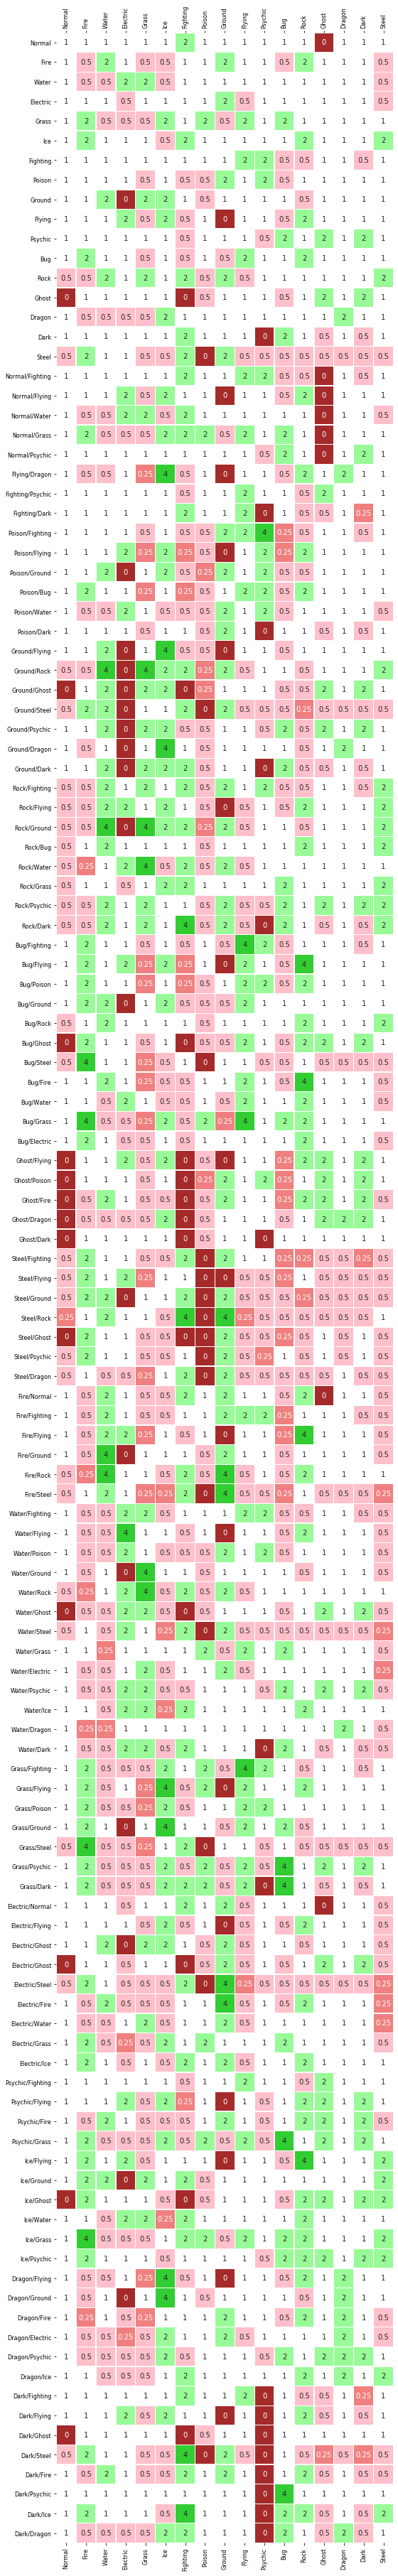

In [65]:
heatmap = ['brown', 'lightcoral', 'pink', 'white', 'white', 'white', 'white', 
           'white', 'palegreen', 'palegreen', 'palegreen', 'palegreen','palegreen', 
           'palegreen', 'palegreen', 'palegreen', 'limegreen']
fig, ax = plt.subplots(figsize = (8.5, 65)) # Debe ser de 610x4046 en pixeles

p = sns.heatmap(array, cmap = heatmap, linewidths = 0.3, ax = ax, annot = True, cbar = False)
#ax.imshow(array, cmap = 'viridis')

ax.set_yticklabels(df_type.index, rotation = 'horizontal', fontsize = 8)
ax.set_xticklabels(df_type.index[:18], rotation = 'vertical', fontsize = 8)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
#plt.show()
plt.savefig('Type_chart.png')